****1. IMPORTING THE LIBRARIES****

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time 
import math
df = pd.read_csv('../input/IBM.csv',delimiter=',')
df=df.set_index(['date'])
df.drop(df.columns[[5,6,7,9]],axis=1,inplace=True)
df.head(5)

Using TensorFlow backend.


,open,high,low,close,volume,vwap,changeOverTime
date,,,,,,,
2014-02-14,151.1094,153.7521,150.8843,153.1352,4665873,153.0540,0.000000
2014-02-18,152.7100,153.3936,151.9930,152.7183,4435484,152.9369,-0.002722
2014-02-19,152.3432,154.7691,152.0681,152.5182,4671705,153.4067,-0.004029
2014-02-20,152.5266,154.1105,152.3849,153.6103,4968267,157.3363,0.003102
2014-02-21,153.6020,154.8192,152.2431,152.3849,5699331,153.1534,-0.004900


**2**.**DATA VISUALISATION** **AND ANALYSIS**

In [2]:
df.describe()

,open,high,low,close,volume,vwap,changeOverTime
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,140.805660,141.788738,139.831802,140.801672,4.527322e+06,140.823483,-0.080540
std,12.829638,12.760268,12.898785,12.817525,2.613646e+06,12.836725,0.083701
min,103.887000,106.011200,103.483500,104.407700,1.193025e+06,104.675500,-0.318199
25%,133.836950,134.759250,133.080475,133.982375,3.147538e+06,133.974925,-0.125071
50%,140.836900,141.649700,139.799800,140.812350,3.903492e+06,140.870100,-0.080470
75%,149.009675,150.032925,148.141375,149.169125,5.008313e+06,149.140450,-0.025899
max,167.002300,167.727200,166.011300,166.956400,3.049019e+07,166.737700,0.090255


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-02-14 to 2019-02-13
Data columns (total 7 columns):
open              1258 non-null float64
high              1258 non-null float64
low               1258 non-null float64
close             1258 non-null float64
volume            1258 non-null int64
vwap              1258 non-null float64
changeOverTime    1258 non-null float64
dtypes: float64(6), int64(1)
memory usage: 78.6+ KB


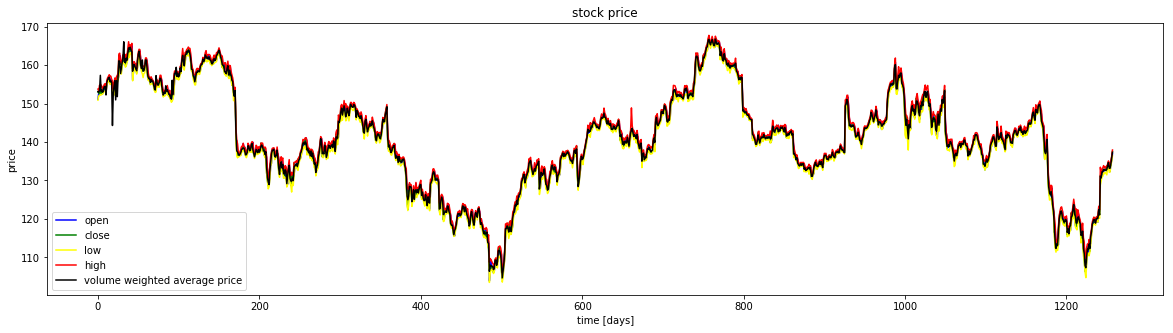

In [4]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(df.open.values,color='blue',label='open')
plt.plot(df.close.values,color='green',label='close')
plt.plot(df.low.values,color='yellow',label='low')
plt.plot(df.high.values,color='red',label='high')
plt.plot(df.vwap.values,color='black',label='volume weighted average price')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

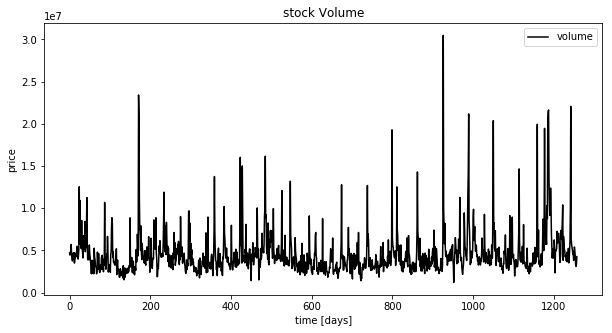

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.plot(df.volume.values,color='black',label='volume')
plt.title('stock Volume')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

**3** **PRE PROCESSING**
 
Using **MinMaxScaler** to **Normalise **the data

 **Volume Weighted Average Price** is used for prediction.The rest of the attributes are only for *analysis and visualisation* purpose

In [6]:
df1=df
df.head()
df1.drop(df.columns[[0,1,2,3,4,6]],axis=1,inplace=True)
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

In [7]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df),:]
print(len(train),len(test))

880 378


Splitting into *Test data and Train data* in the ratio of **70:30**.

In [8]:
def create(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back=1
trainX, trainY = create(train, look_back)
testX, testY = create(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(878, 1, 1)

Converting dataframe into  a ***specific array structure (numpy)*** to feed the data into **LSTM**.

**4 FITTING LSTM MODEL**

In [10]:
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
878/878 [==============================] - 2s 2ms/step - loss: 0.1762
Epoch 2/100
878/878 [==============================] - 1s 774us/step - loss: 0.0459
Epoch 3/100
878/878 [==============================] - 1s 739us/step - loss: 0.0162
Epoch 4/100
878/878 [==============================] - 1s 742us/step - loss: 0.0105
Epoch 5/100
878/878 [==============================] - 1s 754us/step - loss: 0.0059
Epoch 6/100
878/878 [==============================] - 1s 741us/step - loss: 0.0024
Epoch 7/100
878/878 [==============================] - 1s 732us/step - loss: 9.0177e-04
Epoch 8/100
878/878 [==============================] - 1s 740us/step - loss: 7.1238e-04
Epoch 9/100
878/878 [==============================] - 1s 742us/step - loss: 7.1393e-04
Epoch 10/100
878/878 [==============================] - 1s 723us/step - loss: 7.0828e-04
Epoch 11/100
878/878 [==============================] - 1s 735us/step - loss: 7.1303e-04
Epoch 12/100
878/878 [==============================] - 

Training the **LSTM** model.

**Optimiser used**:**RMSProp**

**Loss Metrics**:**Root Mean Square Error**

About RMSProp brief:-
The RMSprop optimizer is similar to the gradient descent algorithm with momentum. **The RMSprop optimizer restricts the oscillations in the vertical direction**. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. The difference between RMSprop and gradient descent is on how the gradients are calculated.  The value of momentum is denoted by beta and is usually set to 0.9. 


**5 PREDICTION PHASE**

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.66 RMSE
Test Score: 1.81 RMSE


**6** **PERFORMANCE ANALYSIS**

After inversion to the norminalised values calculating **RMSE** and displaying the error 

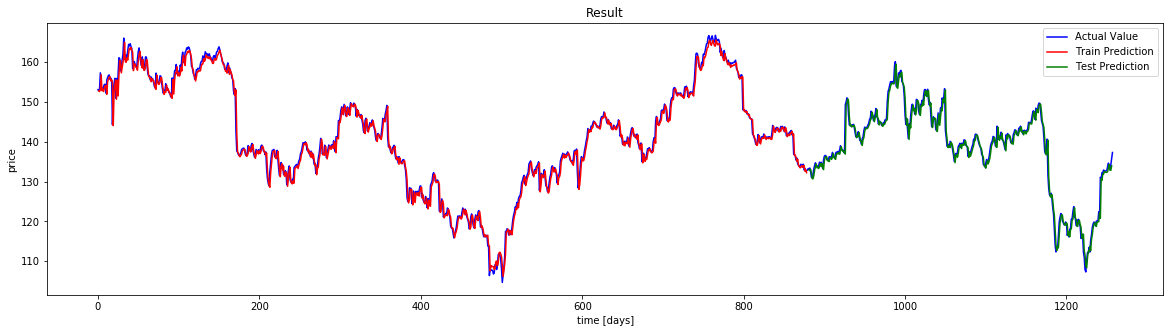

In [12]:

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1)-1, :] = testPredict

plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(scaler.inverse_transform(df1),color='blue',label='Actual Value')
plt.plot(trainPredictPlot,color='red',label='Train Prediction')
plt.plot(testPredictPlot,color='green',label='Test Prediction')
plt.title('Result')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()
predict=pd.DataFrame({'Predicted':testPredict[:,0]})
cc=df1[0:train_size,:]
predict.to_csv('output.csv')
predict.to_csv('given.csv')

**7 CONCLUSION**

Even though LSTM model fits good in the data prediction.There are many other factors stocks price depend upon such as **companies policies,countries economic policies,demonetisation,etc** .